<span>
    <b>Author</b>: Lorenzo Santino 605004 - Giuliano Galloppi 646443<br/>
    <b>Python version:</b>  3.x<br/>
</span>

In [1]:
# Import of the basic packages to use
%matplotlib inline 

import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sci
import math

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score 

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from  kneed import *

from sklearn.metrics import silhouette_score, adjusted_rand_score

from yellowbrick.cluster import KElbowVisualizer

from sklearn.neighbors import KernelDensity
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler   # MinMax normalization
from sklearn.preprocessing import StandardScaler # Z-Scale normalization
from matplotlib import cm

from scipy.cluster.hierarchy import dendrogram, linkage


pd.set_option("display.max_columns", None)

# **<font color=red> Task 2: Clustering Analysis </font>**

Based on the player’s profiles explore the dataset using various clustering techniques. Carefully describe your decisions for each algorithm and which are the advantages provided by the different approaches.

### **<font color=orange> 2.1 Dataset Description </font>**
This notebook contains the clustering analysis on the "players profile" dataset, derived from the previous task (Data Understaning).

The dataset is initially splitted into two different dataframes: "**players_profile_cat**", dedicated to the categorical attributes and "**players_profile_num**" that cointains the numerical features used into the clustering processing.

The dataset contains **10074** observations, each one describing the anagraphic and statistics information of a single tennis player and **29** attributes. <br>

In [2]:
df_players_profile = pd.read_csv("players_profile.csv", sep = ",", index_col = 0) 
print("Shape of Players Profile dataset:\t" + str(df_players_profile.shape))

Shape of Players Profile dataset:	(4370, 29)


In [3]:
# Information about the attributes

df_players_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4370 entries, 105935 to 203475
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       4370 non-null   object 
 1   sex                        4370 non-null   object 
 2   ioc                        4370 non-null   object 
 3   age                        4370 non-null   int64  
 4   ht                         4370 non-null   int64  
 5   hand                       4370 non-null   object 
 6   rank                       4370 non-null   int64  
 7   df_mean                    4370 non-null   int64  
 8   1stIn_mean                 4370 non-null   int64  
 9   2ndWon_mean                4370 non-null   int64  
 10  SvGms_mean                 4370 non-null   int64  
 11  bpSaved_mean               4370 non-null   int64  
 12  bpFaced_mean               4370 non-null   int64  
 13  tot_games                  4370 non-null 

### **<font color=orange> 2.2 Clustering Preprocessing </font>**

#### **<font color=turquoise> 2.2.1 Sample Dataset Selection </font>**

We noticed that we have some players that have played less than 2 games (at least 3000), but we think that exist similar featurs that characterize the players regardless the number of games played. <br>
For this reason, we don't do any sample selection of the data.

#### **<font color=turquoise> 2.2.2 Features Dataset Selection </font>**

In [4]:
# Separate the categorial attributes and the numerical attributes

df_players_profile_num = df_players_profile[df_players_profile._get_numeric_data().columns]

print("Shape of Players Profile numerical   dataset:\t" + str(df_players_profile_num.shape))
df_players_profile_num

Shape of Players Profile numerical   dataset:	(4370, 23)


,age,ht,rank,df_mean,1stIn_mean,2ndWon_mean,SvGms_mean,bpSaved_mean,bpFaced_mean,tot_games,winrate,ace_on_service(%),df_on_service(%),point_on_first_service(%),Hard_win(%),Clay_win(%),Grass_win(%),Carpet_win(%),Hard_los(%),Clay_los(%),Grass_los(%),Carpet_los(%),tie_break_rate(%)
id,,,,,,,,,,,,,,,,,,,,,,,
105935,25,185,1428,1,27,12,8,2,2,1.0,100.00,4.76,2.38,77.78,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
126502,22,185,1581,2,43,14,11,3,4,1.0,100.00,5.71,2.86,74.42,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
138845,19,185,1519,4,41,22,11,4,7,1.0,100.00,7.41,4.94,70.73,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
202165,18,185,1371,5,37,15,10,4,6,1.0,100.00,13.85,7.69,72.97,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
134886,21,185,1455,5,46,9,11,2,7,1.0,100.00,1.52,7.58,56.52,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202478,28,177,454,3,43,11,10,4,8,190.0,42.63,2.22,4.97,62.46,28.42,4.21,7.89,2.11,35.79,8.42,9.47,3.68,8.42
205922,26,177,627,3,43,10,10,3,7,70.0,37.14,1.95,4.27,61.59,22.86,14.29,0.00,0.00,37.14,25.71,0.00,0.00,1.43
201554,28,177,176,4,43,11,10,3,7,198.0,63.13,2.48,5.76,63.73,54.04,3.54,5.56,0.00,26.77,6.57,3.54,0.00,11.11


#### **<font color=turquoise> 2.2.3 Subset Feature Selection </font>**

To avoid the **curse of dimensionality** we need to reduce the categorical features, going to select the most representative players profile statistical attributes.

In [5]:
selected_features = ["point_on_first_service(%)", "ace_on_service(%)", "rank", "2ndWon_mean"]

df_players_profile_core = df_players_profile_num.loc[:, selected_features]

#### **<font color=turquoise> 2.2.1 Normalization </font>**

The most common adopted normalizations are: **Z-Score** and **Min-Max**.
- The Min-Max normalization approach guarantees all features will have the exact same scale but does not handle outliers well. <br> <br>
- The Z-Score normalization approach consider the shape and the statistical property of the distribution, and tries to center data with respect to the mean and standard deviation of data. <br>
This normalization handles outliers, but does not produce normalized data with the exact same scale.

In the coming analysis we choose to use the Z-SCore normalization (from sklearn library) because it is stronger to handle the outliners. 

In [6]:
z_scaler = StandardScaler()

players_profile_num_scaled = z_scaler.fit_transform(df_players_profile_core)

In [7]:
#scaler = MinMaxScaler()
#players_profile_num_scaled = scaler.fit_transform(df_players_profile_core.values)
#df_players_profile_num_scaled = pd.DataFrame(players_profile_num_scaled, columns=df_players_profile_core.columns)

#### **<font color=turquoise> 2.2.2 Feature Reduction </font>**

Singular values help us compute variance explained by each singular component.<br>
We can visualize the percent variance explained by each principal component to understand the structure in the data. <br>

Here is the plot giving us the percentage of variance explained by each singular component. We can see that the first vector explains most of the variation in the data. <br>
we need to choose k such that the top k principal component explain a certain amount of variance of the data.

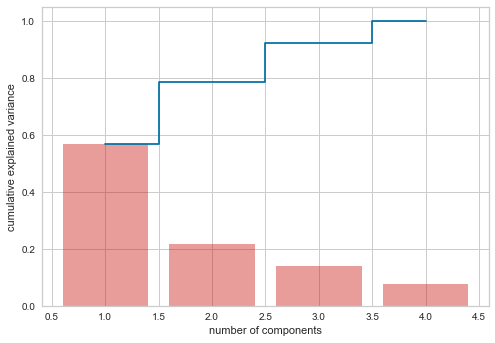

In [8]:
pca = PCA()
pca.fit(players_profile_num_scaled)

plt.step(range(1, players_profile_num_scaled.shape[1] + 1), pca.explained_variance_ratio_.cumsum(), 
         where='mid', label='Cumulative Explained Variance')
         
plt.bar(range(1, players_profile_num_scaled.shape[1] + 1), pca.explained_variance_ratio_, 
        alpha=0.4, color='r', label='Individual Explained Variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

A best practice is choose the principal components that garantee at least 80% of the variance. So, for this reason, we decide to keep **2** components.

In [9]:
pca = PCA(n_components = 2)
pca_players_profile = pca.fit_transform(players_profile_num_scaled)
pca_players_profile.shape

(4370, 2)

### **<font color=orange> 2.3 Clustering Analysis - K-Means  </font>**

We are going to analyse the profile players dataset using the K-Means clustering algorithm. <br>
To evaluate the appropriate number of clusters, **k** parameter, we explore three methods:

- The **elbow method**
- The **silhouette coefficient**
- The **Hierarchical Clustering**

We preparare the variables for the k-means clustering algorithm.

In [10]:
kmeans_args = {
    "init": "random",   # random: choose `n_clusters` observations (rows) at random from data for the initial centroids
    "n_init": 100,       # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    "max_iter": 300,    # Maximum number of iterations of the k-means algorithm for a single run.
    "tol" : 1e-4,       # Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
}

k_min = 2   # Minimum number of cluster 
k_max = 15   # Maximum number of cluster

silhouette_coefficients = []  # List of silhouette score
sse = []                      # List of inertia values
    

Run the k-mean algorithm start from k_min into k_max clusters.

In [11]:
for k in range(k_min, k_max):    
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    clusters = kmeans.fit_predict(pca_players_profile)
    centroids = kmeans.cluster_centers_

    # Get the SSE metric
    sse.append(kmeans.inertia_)

    # Get silhouette metric
    silhouette_vals = silhouette_samples(pca_players_profile, clusters)
    silhouette_coefficients.append(silhouette_score(pca_players_profile, kmeans.labels_))
    

We now evaluate the results and try to identify the optimal **k** paramter.

In [12]:
candidate_k = []

#### **<font color=turquoise> 2.3.1 Elbow Method </font>**

In cluster analysis, the **elbow method** is a heuristic used in determining the optimal number of clusters in a data set. <br>
It consists of plotting the SSE as a function of the number of clusters, and **picking the elbow** of the curve as the *k* to use.

We observer the SSE through the k, to determinate the optimal **elbow point**.

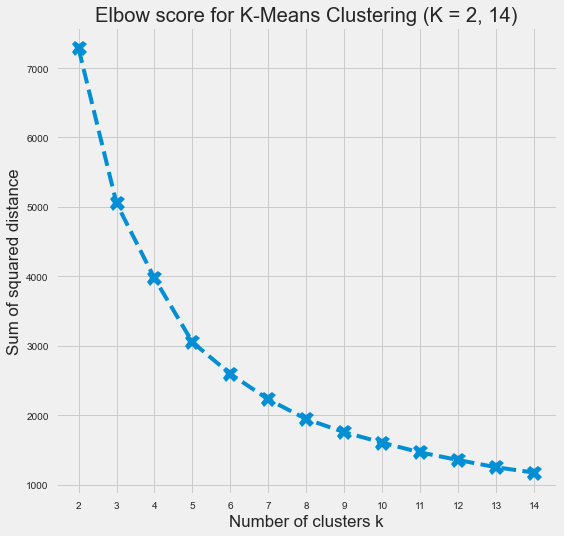

In [13]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.plot(range(k_min, k_max), sse, marker='X', markersize=15, linestyle='--')
plt.xticks(range(k_min, k_max))
plt.xlabel("Number of clusters k")
plt.ylabel('Sum of squared distance')
plt.title("Elbow score for K-Means Clustering (K = " + str(k_min) + ", " + str(k_max - 1) + ")") 
plt.show()

We can also make a analytically check using a Python package, **kneed**, to identify the elbow point programmatically.

In [14]:
KneeLocator(range(k_min, k_max), sse, curve = "convex", direction = "decreasing").elbow

5

In [15]:
candidate_k.append(5)

#### **<font color=turquoise> 2.3.2 Silhouette Coefficient </font>**

The silhouette score is a indicator of both separation and cohesion among clusters. Here we look for the clusterization with the highest average silhouette score among those computed by K-means.

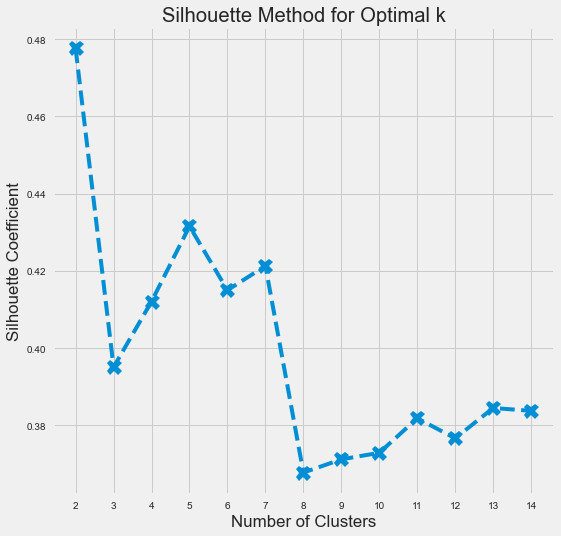

In [16]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
plt.plot(range(k_min, k_max), silhouette_coefficients, marker='X', markersize=15, linestyle='--')
plt.xticks(range(k_min, k_max))
plt.title('Silhouette Method for Optimal k')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

An analysis of the average Silhouette score highlights that good candidate for the **k** parametere could be 2, 3 and 4.

In [17]:
candidate_k.append(2)
candidate_k.append(4)

#### **<font color=turquoise> 2.3.3 Hierarchical Clustering </font>**

We can also use the Ward's method to try to identify the optminal number of clusters going to analyse how the clusters are made. <br>
In the Ward's method two clusters are merged togheter in case the two elements are the elements having the less SSE error. It's less susceptible to noise and outliers.

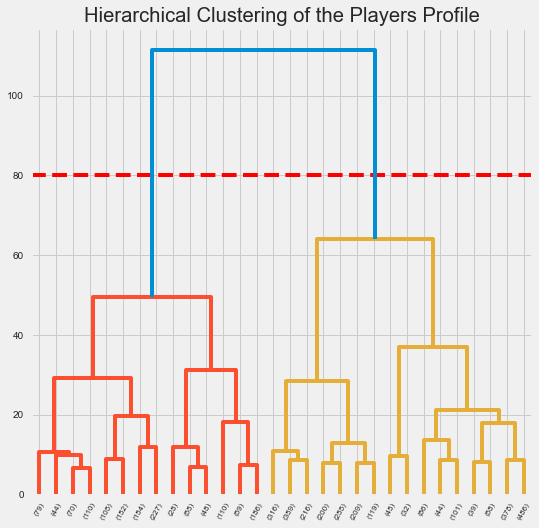

In [18]:
plt.figure(figsize=(8,8))
plt.title("Hierarchical Clustering of the Players Profile")
plt.axhline(y=80, ls='--', c='red')
dend = dendrogram(linkage(pca_players_profile, method='ward'), truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True)

The clustering obtained throught the Ward linkage seems to suggest the presence of **4** main cluster.

In [19]:
candidate_k.append(2)

#### **<font color=turquoise> 2.3.5 Choose of K: evaluate and compare the different clustering thourgh internal metrics </font>**

Using the candidate **k** list, we perform again a the K-Means clustering algorithm, and we store, for each **k** the information about the centroid, SSE

In [20]:
candidate_k = list(set(candidate_k))
candidate_k.sort()
print(candidate_k)

[2, 4, 5]


In [21]:
kmeans_args = {
    "init": "random",   # random: choose `n_clusters` observations (rows) at random from data for the initial centroids
    "n_init": 100,       # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    "max_iter": 1000,    # Maximum number of iterations of the k-means algorithm for a single run.
    "tol" : 1e-5,       # Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
}

In [22]:
cs_centers = []
cs_labels = []
cs_inertia = []

for k in candidate_k:
    kmeans = KMeans(n_clusters = k, **kmeans_args)
    kmeans.fit(pca_players_profile)

    cs_centers.append(kmeans.cluster_centers_)
    #cs_centers.append(scaler.inverse_transform(kmeans.cluster_centers_)) # we store the coordinates of the centroids
    cs_labels.append(kmeans.labels_) # we store the labels associated with the records
    cs_inertia.append(kmeans.inertia_) # we store the SSE value associated with the clustering

We now evaluate each clustering respect to the measurser of the clusters cohesion and cluster sepratrions. <br>
After this analysis we are able to identify the best **k** that defined the optimal **k**-means algorithm paramter. <br>

The (internal) evaluation metrics that we are going to compute are:
* **Sum of Squared Error (SSE)** 
* **Davies Bouldin Index** 
* **Silhouette Score** 

In [23]:
cluster_metrics = pd.DataFrame() # we create a dataframe to contain the results of the evaluation

k_cols = []

for k in candidate_k:
    k_cols.append('K_' + str(k))
    
sse = []
davies_bouldini = []
silhouette = []
cal_har=[]


for i in range(len(candidate_k)):
    sse.append(round(cs_inertia[i], 3))
    davies_bouldini.append(round(davies_bouldin_score(pca_players_profile, cs_labels[i]), 4))
    silhouette.append(round(silhouette_score(pca_players_profile, cs_labels[i]), 4))
    cal_har.append(calinski_harabasz_score(pca_players_profile, cs_labels[i]))


cluster_metrics["Cluster K"] = candidate_k
cluster_metrics["SSE"] = sse
cluster_metrics["Davies Bouldini"] = davies_bouldini
cluster_metrics["Silhouette"] = silhouette
cluster_metrics['Calinski_Harabasz'] = cal_har
cluster_metrics.set_index(["Cluster K"], inplace=True)

cluster_metrics

,SSE,Davies Bouldini,Silhouette,Calinski_Harabasz
Cluster K,,,,
2,7282.175,0.8504,0.4776,3872.589955
4,3972.109,0.8734,0.4121,3578.258838
5,3051.897,0.8219,0.4314,3821.119890


Regarding the **Sum of Squared Errors (SSE)**:
- a decrease in the SSE value proportional to the number of clusters is an expected behavior, therefore opting directly for the clustering with the lowest sum of squared distances may not be a worthwhile decision.

Regarding the **Davies Bouldini Index**: 
- a lower Davies-Bouldin index relates to a model with better separation between the clusters and, in this regard, the clustering with **k equals to 2 seems to present the best separation among its clusters**.

Regarding the **Silhouette Score**: 
- a higher value for the Silhouette Coefficient relates to a model with better defined clusters, in this regard, the clustering with **k equals to 2 presents the best score**.

Regarding the **Calinski-Harabasz Index**: 
- similarly to the Silhouette Coefficient, a higher value for the Calinski-Harabasz score relates to a model with better defined clusters, in this regard, the clustering with **k equals to 2 seems to present the best defined clusters**.

In [24]:
k = 2 # it contains the optimal value of k
index_k = candidate_k.index(k)
centers = cs_centers[index_k] # it contains the centroids for the optimal value of k
labels = cs_labels[index_k] # # it contains the labels for the optimal value of k

columns = df_players_profile_num.columns

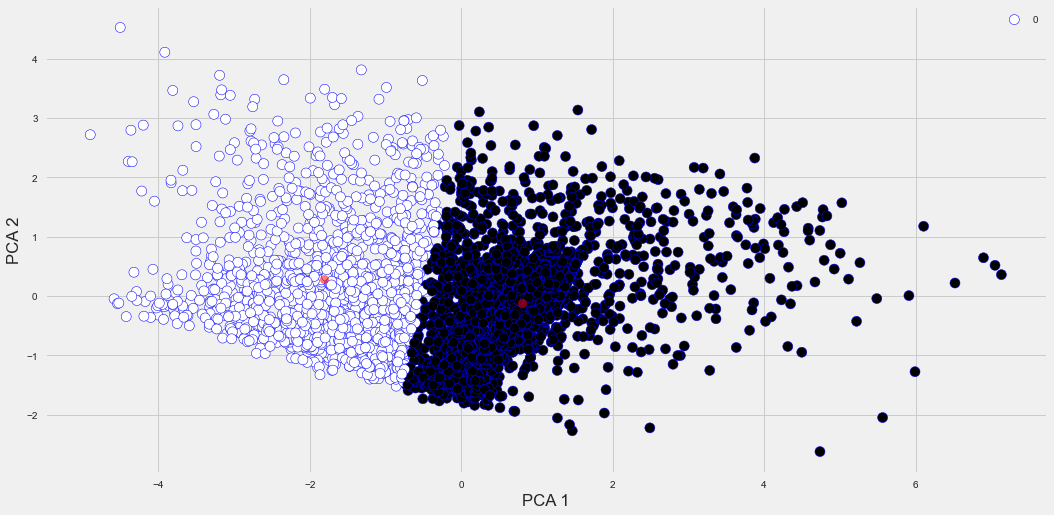

In [25]:
plt.figure(figsize=(16, 8))
plt.scatter(*pca_players_profile.T, c=labels, s=100, edgecolors = "blue", alpha=1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(labels)
# select cluster centers
plt.scatter(*centers.T, c='red', s=70, alpha=0.5)

{0: 1335, 1: 3035}


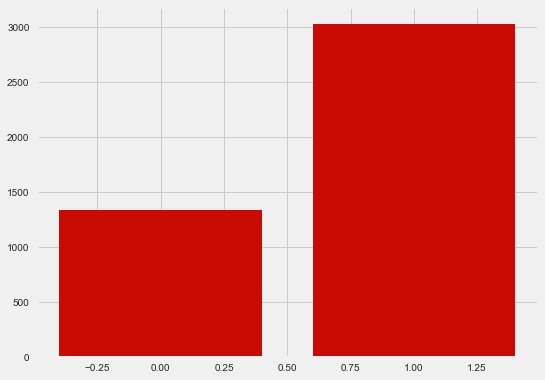

In [26]:
hist, bins = np.histogram(labels, bins=range(0, len(set(labels)) + 1))
clust_dict = dict(zip(bins, hist))

print(clust_dict)

plt.figure(figsize=(8, 6))
plt.bar(list(clust_dict.keys()), clust_dict.values(), color='r')
plt.show()

Cluster 0 avg silhouette: 0.38640666300004517
Cluster 1 avg silhouette: 0.5177431155485557
Total avg silhouette: 0.4776208811887704


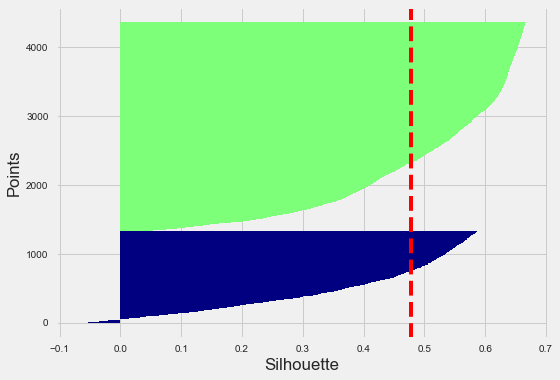

In [27]:
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(pca_players_profile, labels)

y_ax_lower, y_ax_upper = 0, 0
y_tick = []

for i, c in enumerate(cluster_labels):

    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()

    print('Cluster', c, 'avg silhouette:', np.mean(c_silhouette_vals))

    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_tick.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
print('Total avg silhouette:', silhouette_avg)
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.yticks=(y_tick, cluster_labels + 1)
plt.ylabel('Points')
plt.xlabel('Silhouette')
plt.tight_layout()

C:\Users\santi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


object


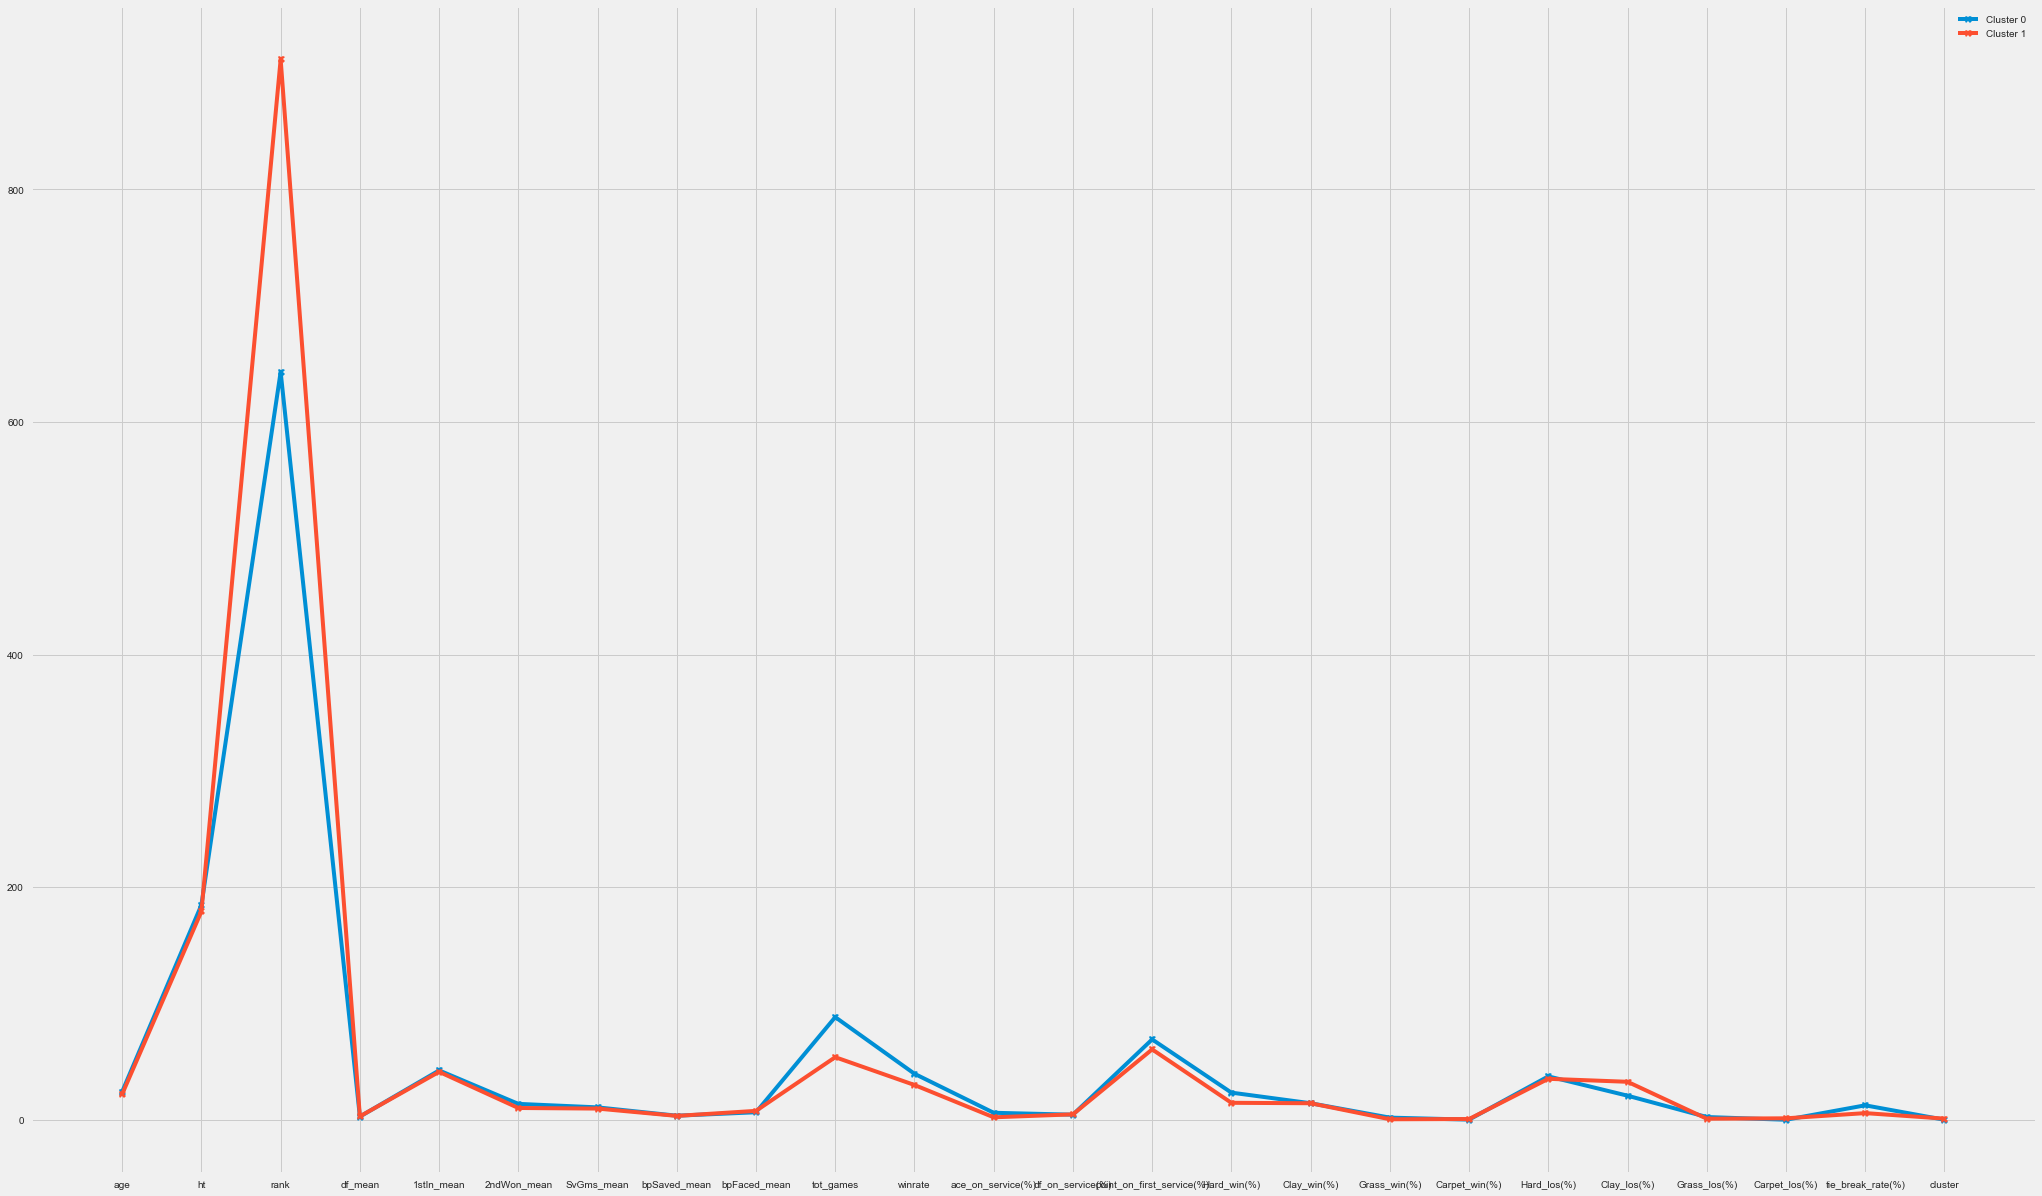

In [28]:
#plot_basic_statistics(customer_profile, clusters_customers, customer_profile.columns)
from sklearn.metrics.pairwise import euclidean_distances

plt.figure(figsize=(32, 20))

columns = df_players_profile_num.columns
df_players_profile_num["cluster"] = labels

means = []
std = []

columns = df_players_profile_num.columns
print(columns.dtype)
#columns.drop["cluster"]

for i in np.unique(df_players_profile_num["cluster"].array):
    clust = df_players_profile_num.loc[df_players_profile_num['cluster'] == i, columns]
    means.append(clust.describe().loc['mean'].values)
    std.append(clust.describe().loc['std'].values)  

legend = []

for i in np.unique(df_players_profile_num["cluster"].array):
    plt.plot(range(0, columns.shape[0]), means[i], marker='X')
    legend.append('Cluster %d' %i)


plt.legend(legend)
plt.xticks(range(0, columns.shape[0]), columns);


In [29]:
df_players_profile_num["cluster"] = labels 

players_profile_cluster_0 = df_players_profile_num.loc[df_players_profile_num["cluster"] == 0]
players_profile_cluster_1 = df_players_profile_num.loc[df_players_profile_num["cluster"] == 1]

C:\Users\santi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
players_profile_cluster_0.describe()[selected_features]

,point_on_first_service(%),ace_on_service(%),rank,2ndWon_mean
count,1335.000000,1335.000000,1335.000000,1335.000000
mean,69.107386,6.020884,643.043446,13.672659
std,4.379628,2.194777,498.345848,2.470812
min,33.750000,0.000000,1.000000,4.000000
25%,66.535000,4.390000,238.500000,12.000000
50%,69.070000,5.750000,519.000000,13.000000
75%,71.625000,7.560000,943.000000,14.000000
max,100.000000,17.650000,2130.000000,29.000000


In [31]:
players_profile_cluster_1.describe()[selected_features]

,point_on_first_service(%),ace_on_service(%),rank,2ndWon_mean
count,3035.000000,3035.000000,3035.000000,3035.000000
mean,60.521199,2.128362,911.776606,10.136079
std,4.749466,1.021825,442.668934,1.732888
min,16.670000,0.000000,14.000000,0.000000
25%,59.300000,1.680000,582.500000,10.000000
50%,61.490000,2.010000,933.000000,10.000000
75%,62.865000,2.290000,1204.000000,11.000000
max,77.780000,9.180000,2257.000000,21.000000


### **<font color=violet> 2.5 Clustering Analysis - DBScan  </font>**

The *Density-Based SPatial Clustering of Application with Noise* clustering algorithm it's based on the data density in the dataspace, it is particularly effective for clusters of particular shape.

It has as input two parameters:
* **eps**: The maximum distance between two samples for them to be considered as in the same neighborhood.
* **min_samples**: the minimum number of points needed to create a cluster.

and as output:
* cluster **labels** for each point in the dataset. Noisy samples are given the label -1.

The *density* is defined by the number of points within a specific radius *eps*. 

It will be used the same normalized dataset used before.

To understand which is the optimal combination for both the parameters,
we tried different values for the *min_sample* parameter (knowed also like *k* in this context) so in this way we could know how many neightbors we had to consider in a region with radius *eps* (second parameter) so to define it approximately "cluster".

Then we did the same process viceversa, obtaining a **more precise and stable results** for our parameters. 

- Using the <u>**knee method**</u> we selected the candidates as best values of "*eps*", for all the "*min_sample*" tried.

In [32]:
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

dist = pdist(X=players_profile_num_scaled, metric='euclidean')  # pair-wise distance: how every record is far from all other
print (dist)
dist = squareform(dist)                                            # distance matrix given the vector dist

[1.08607268 4.22122861 4.1560989  ... 1.30597438 0.19763839 1.29408208]


Now we calculate the distance of the *'K-th neighbour*, in this way we could find the best value of K.

Usufruendo dei visualization tool we can define a stime for the value of *epsilon* parameter gets lower a lot, unless it stableize itself.

<br>
We create plots experimenting different values for *k* to confirm which are the best associations for different values of *k* and *eps* parameters.

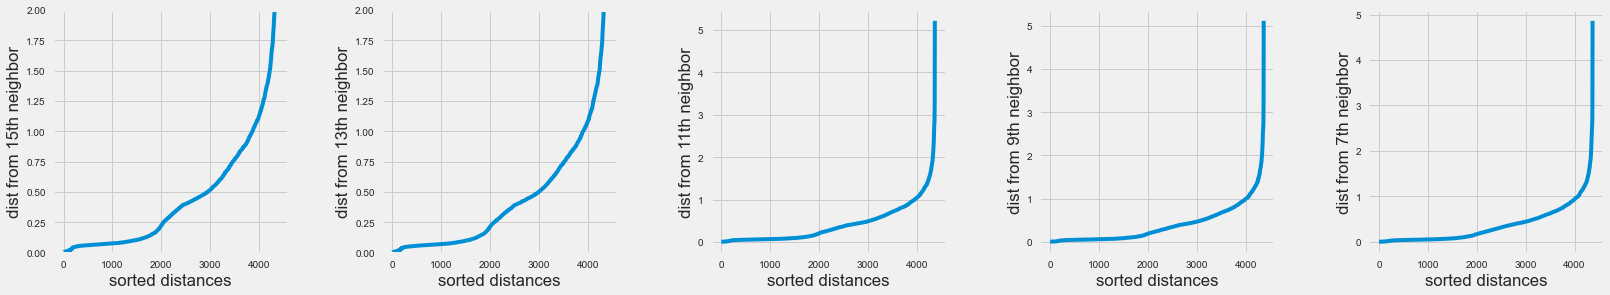

In [33]:
# Setting five plots to compare:
import matplotlib.ticker as ticker

figure = plt.figure(figsize=(30,10))
figure_dims = (2, 6)
figure.subplots_adjust(hspace=0.4, wspace=0.4)

k = 15
    
for i in range(0,1):
    for j in range(0,5):
        plt.subplot2grid(figure_dims, (i,j))
        kth_distances = list()
        for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])
        plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
        
        plt.ylabel('dist from %sth neighbor' % k)
        plt.xlabel('sorted distances')
        plt.tick_params(axis='both', which='major')
        plt.grid(True)

        if(j<2):
            plt.ylim(0,2)
        

        k-=2


From these plots we could see in detail in first two plots, and zoomed in others,that the candidate values for epsilon starting from 0.1 and arrives around 1.


- Now we will try <u>**knee**</u> with <u>*many neighbours*</u>  and <u>*fixed epsilon*</u> :

From previous analysis, now we will try with a huge number of neightbors that will be much more than 15, we use **30**:

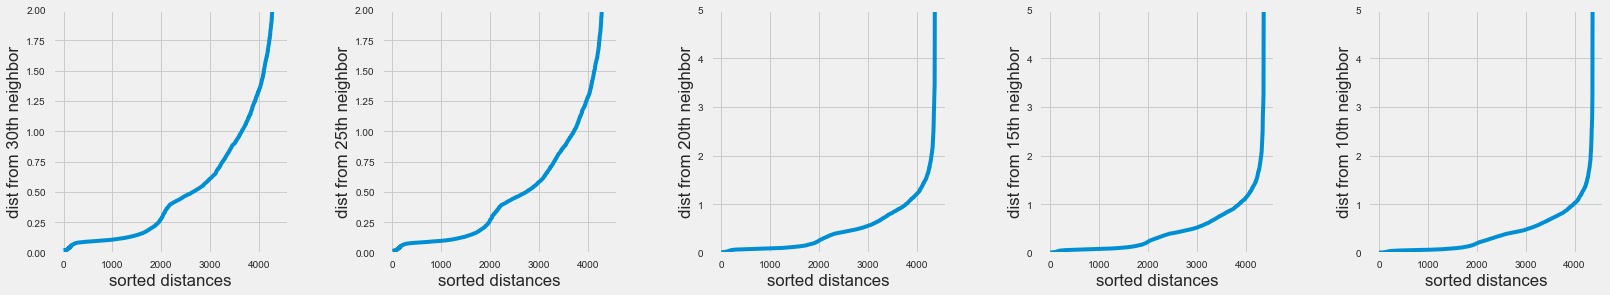

In [34]:
# Setting five plots to compare:
figure = plt.figure(figsize=(30,10))
figure_dims = (2, 6)
figure.subplots_adjust(hspace=0.4, wspace=0.4)

k = 30
    
for i in range(0,1):
    for j in range(0,5):
        plt.subplot2grid(figure_dims, (i,j))
        kth_distances = list()
        for d in dist:
            index_kth_distance = np.argsort(d)[k]
            kth_distances.append(d[index_kth_distance])
        plt.plot(range(0, len(kth_distances)), sorted(kth_distances))

        plt.ylabel('dist from %sth neighbor' % k)
        plt.ylim(0,1)
        plt.xlabel('sorted distances')
        plt.tick_params(axis='both', which='major')
        plt.grid(True)
        plt.ylim(0,5)

        if(j<2):
            plt.ylim(0,2)
        
        
        k-=5

In the case, the *eps* value starts the same around ***0.1 <u>BUT</u> becomes pretty stable around 1.5.***

So for both the few and the more-neighbor cases, **the results for *epsilon* evaluation is almost the same, it became stable as k increases**.

- Now we will try <u>**knee**</u> with only <u>*fixed epsilon*</u> :

Now we did the same process but viceversa, so that by ***fixing epsilon*** and deriving the best value for ***k***. 

Trying the execution of a similar analysis fixing the *epsilon* parameter instead of the number of neightbors (k) we assure that our parameter evaluation is correct.

So by choosing epsilon we build a density plot for this fixed radius and look for an elbow there.

C:\Users\santi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


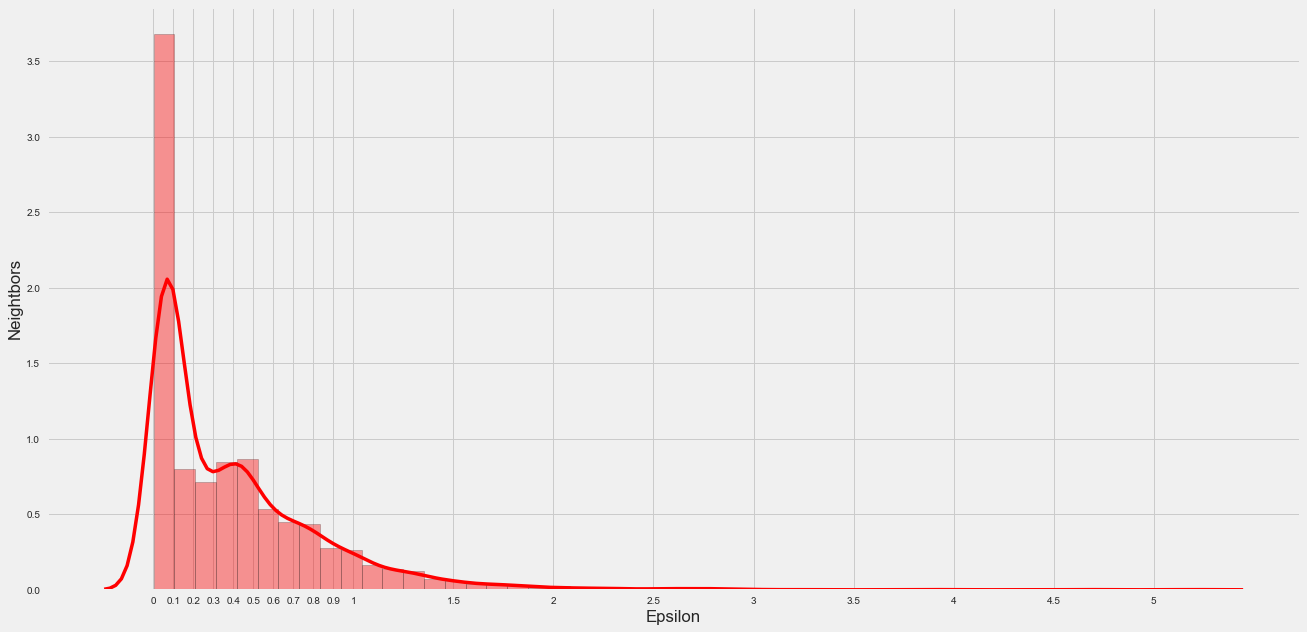

In [35]:
figure = plt.figure(figsize=(20,10))

# Density Plot and Histogram of all arrival delays
sns.distplot(kth_distances, kde=True, 
             color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3.5})
plt.ylabel('Neightbors')
plt.xlabel('Epsilon')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,3,3.5,4,4.5,5],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,2.5,3,3.5,4,4.5,5])
#plt.ylim(bottom=0,top=1.5)
plt.tick_params(axis='both', which='major')
plt.grid(True)
plt.show()

So we declare that the best value for 'epsilon' concerning ***0.1***, but also we could considerate a value around ***1*** on a *min_sample* of approximative increasing ~25

#### **<font color=turquoise> 2.5.1 Execution and Statistics: </font>**

We display some statistics about all the different runs we will execute, in order to understand which of those gives the best result and so **which configuration of parameters is the best**.

For each run of the algorithm, and so for each different combination of the two parameters, we compute:
- the number of clusters founded
- how much noise the algorithm has detected
- the number of record for each cluster (i.e. the population)

The table will summarize all the statistics we computed, and it will be useful for compare them and make some consideration about the results obtained.

In [36]:
eps =       [0.1, 0.11, 1.5, 1.7,    0.1, 0.12, 0.2, 1, 1.2,   0.1, 0.15, 0.2, 1,   1.5,    0.10, 0.11, 0.2, 1.5, 1.6,   0.09, 0.1, 0.2,1.5, 1.6,   ] #20 eps
m_samples = [6,   6,    6,    6,      20,  20,  20,  20, 20,     25,  25,  25, 25,  25,     30,   30,   30, 30,  30,    35,   35,  35, 35,  35,     ] #20 samples

dbscan = [] 

for i in range(len(eps)): 
    d = DBSCAN(eps=eps[i], min_samples=m_samples[i]) # algorithmic parameters
    dbscan.append(d)
    dbscan[i].fit(pca_players_profile)

In [37]:
# OUTPUT
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=8)
dbscan[0].labels_
# dbscan[1].labels_

array([-1, -1, -1, ...,  1,  1,  1], dtype=int64)

- Follows the statistics computations above mentioned:

In [38]:
dbscan_results = pd.DataFrame()

number_of_classes = []
n_noise = []
dbscan_exec=[]

for i in range(len(eps)): 
    number_of_classes.append(np.unique(dbscan[i].labels_).shape[0])
    n_noise.append(list(dbscan[i].labels_).count(-1))
    dbscan_exec.append(i+1)

Values obtained from the DBScan Algorithm:

In [39]:
# dbscan_results['DBSCAN case'] = dbs_run
dbscan_results['K'] = m_samples
dbscan_results['Eps'] = eps
dbscan_results['Number of clusters'] = number_of_classes

Analysis of the cluster population for each one:

In [40]:
zero_population = []
one_population = []
two_population = []
for i in range(len(eps)): 
    zero_population.append(list(dbscan[i].labels_).count(0))
    one_population.append(list(dbscan[i].labels_).count(1))
    two_population.append(list(dbscan[i].labels_).count(2))

dbscan_results['Noise label'] = -1
dbscan_results['Noise population'] = n_noise
dbscan_results['Population of cluster 0'] = zero_population
dbscan_results['Population of cluster 1'] = one_population
dbscan_results['Population of cluster 2'] = two_population

dbscan_results

,K,Eps,Number of clusters,Noise label,Noise population,Population of cluster 0,Population of cluster 1,Population of cluster 2
0,6,0.10,36,-1,968,26,3038,73
1,6,0.11,34,-1,817,3138,81,37
2,6,1.50,2,-1,2,4368,0,0
3,6,1.70,1,-1,0,4370,0,0
4,20,0.10,4,-1,2240,1497,595,38
5,20,0.12,3,-1,2074,2265,31,0
6,20,0.20,6,-1,862,3424,22,25
7,20,1.00,2,-1,11,4359,0,0
8,20,1.20,2,-1,8,4362,0,0
9,25,0.10,4,-1,2378,1385,571,36


From the analysis we can say that the clustering result are quiet unbalanced.
But we have noticed better performances with a very high number of neighbors and we have also noticed that passing from 0.01 to 1/1.5 in the value of the *epsilon* parameter makes a drastically difference that not improves performance.

#### **<font color=turquoise> 2.5.2 Consideration on the best configuration of parameters: </font>**

Considering the table of previous analysis on parameters, among similar combinations we choose to test the combo on row 14:  ***min_sample** = 30, **eps** = 0.1* ; 

As a matter of fact, this combo **returns the best configuration** is pretty similar to other ones in terms of number of clusters detected, but we choose it for its best balance between noise points and clusters points. 
<b></b>

In [41]:
ROW = 14

df_players_profile_clusters = df_players_profile_core.copy()
df_players_profile_clusters['DBSCAN'] = dbscan[ROW].labels_

***Scatter plots visualization***:
plot the feature correlation, in this way we can visualize all the dense regions detected

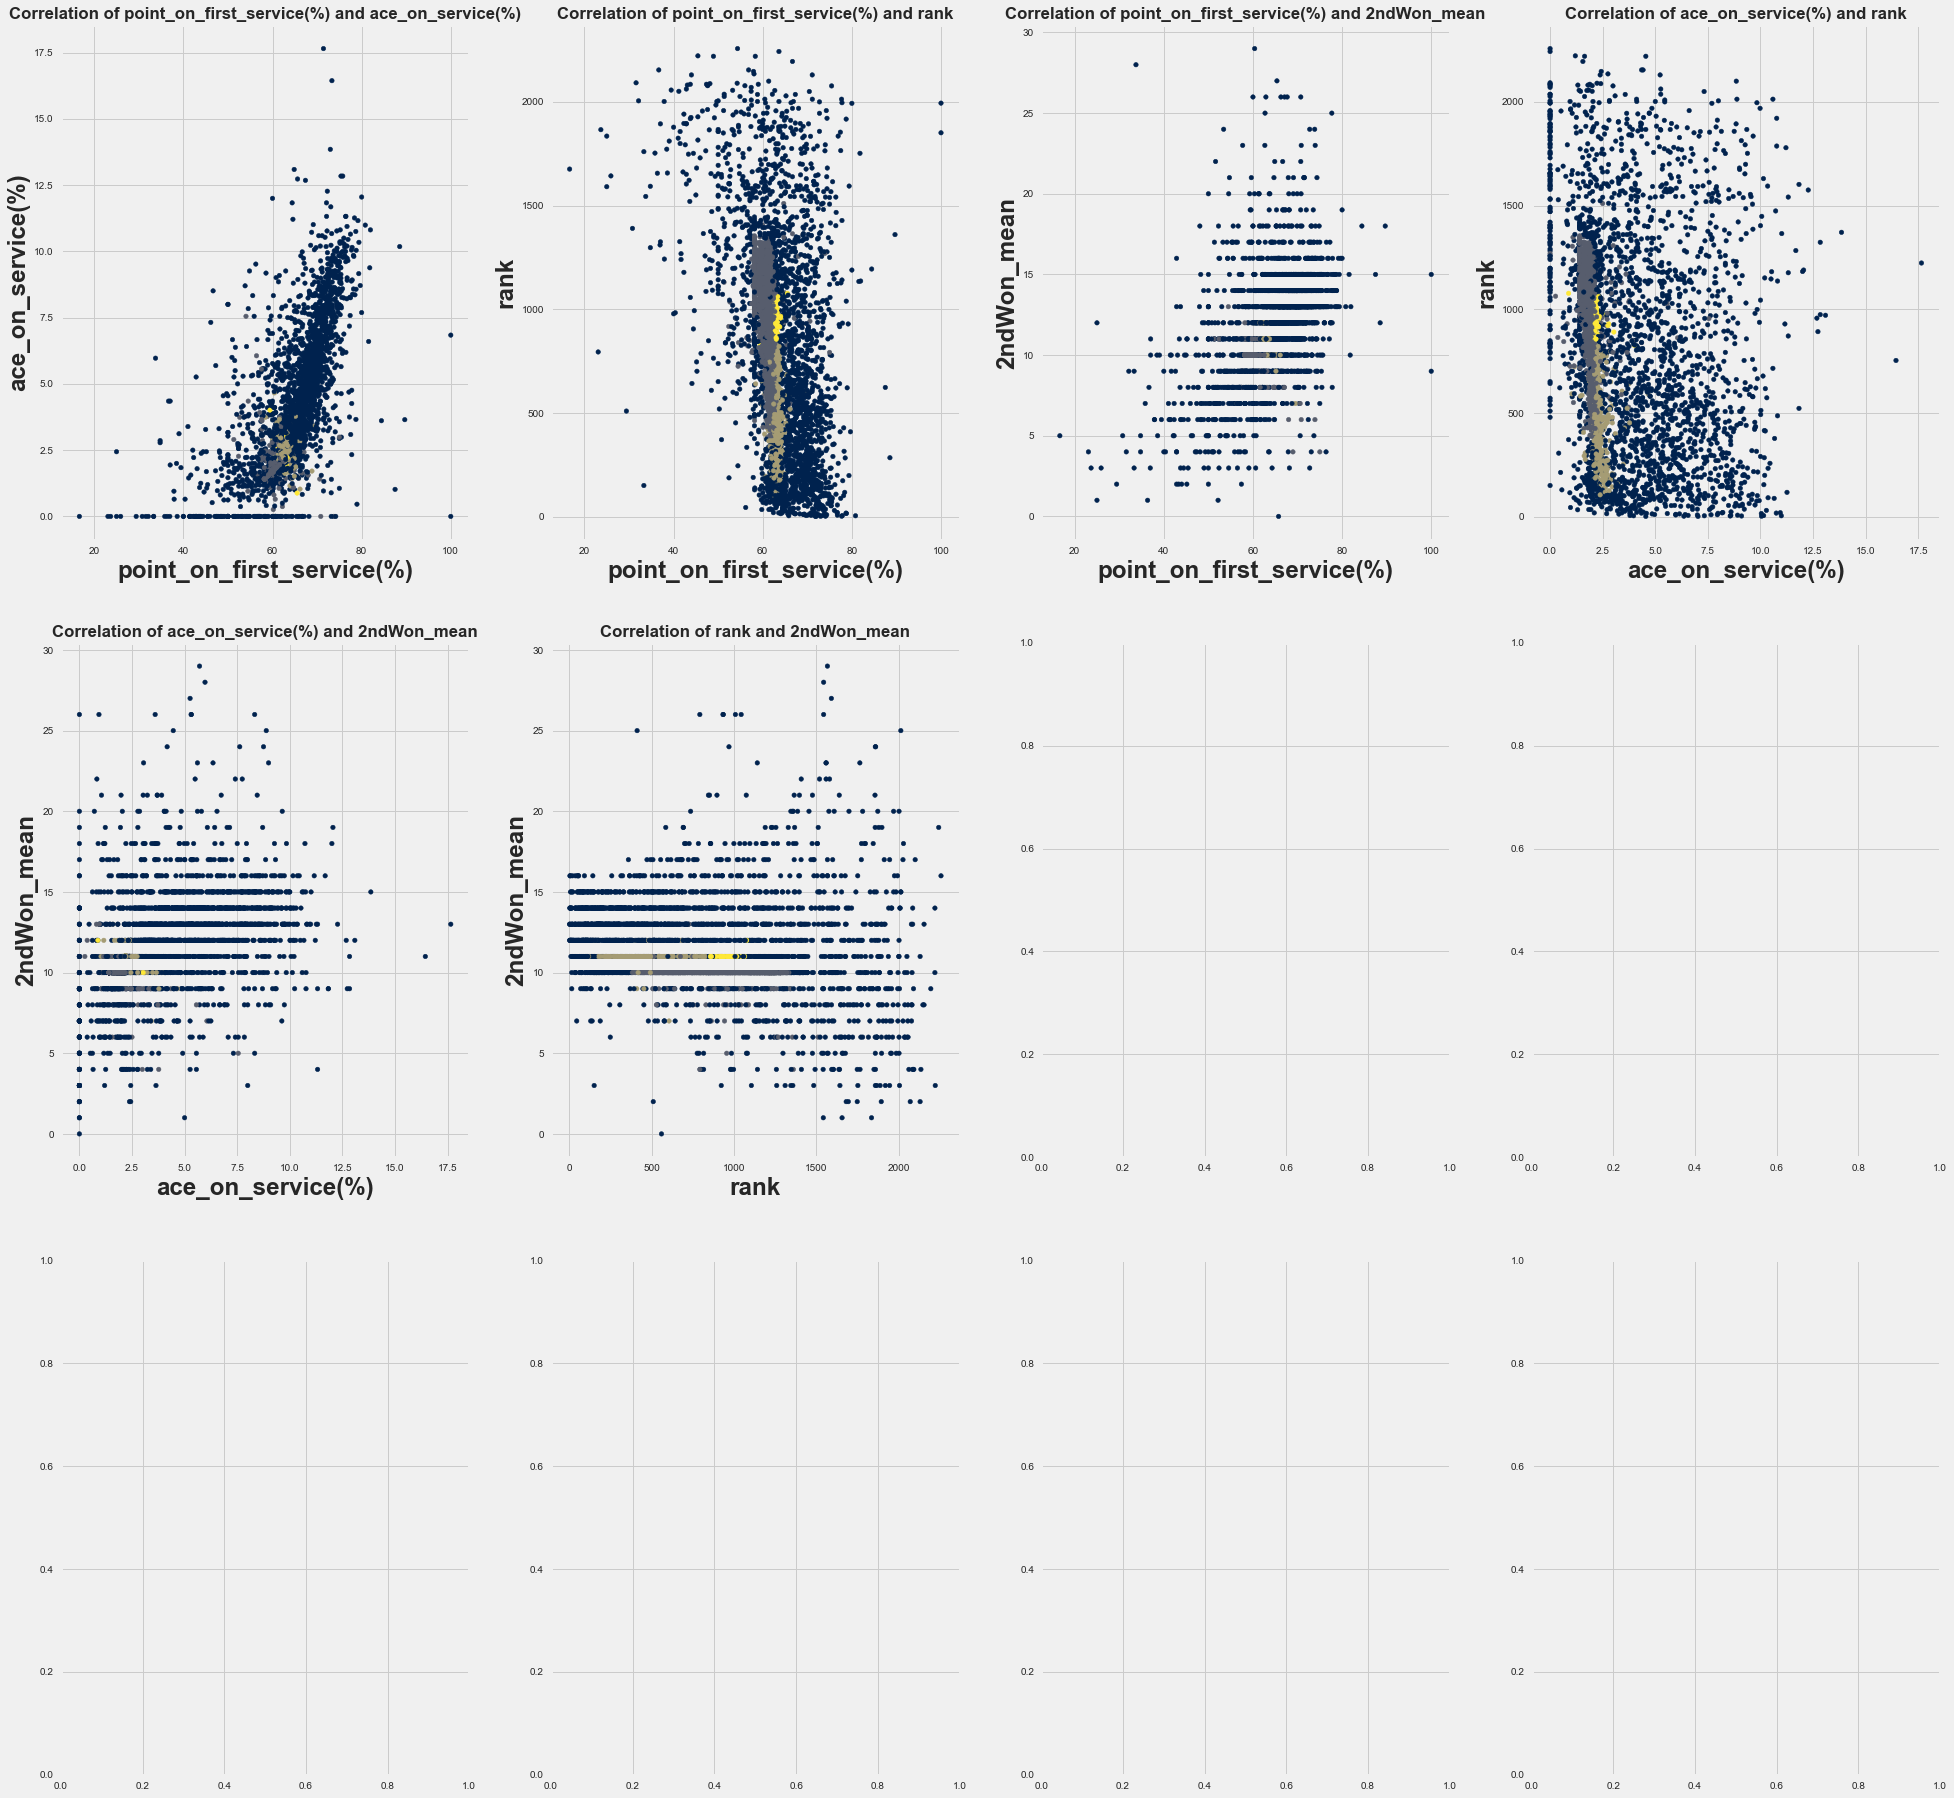

In [42]:
f, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,30))
index = 0
for i in range(0,len(df_players_profile_core.columns)):
    for j in range(i+1,len(df_players_profile_core.columns)):
        axs[int(index/4)][index%4].scatter(df_players_profile_core[df_players_profile_core.columns[i]], df_players_profile_core[df_players_profile_core.columns[j]], c=dbscan[ROW].labels_, s=20, cmap=cm.cividis)
        axs[int(index/4)][index%4].set_title('Correlation of ' + df_players_profile_core.columns[i] + ' and ' + df_players_profile_core.columns[j], fontdict={'fontsize': 'large', 'fontweight' : 'bold'})
        axs[int(index/4)][index%4].set_xlabel(df_players_profile_core.columns[i], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        axs[int(index/4)][index%4].set_ylabel(df_players_profile_core.columns[j], fontdict={'fontsize': 'xx-large', 'fontweight' : 'bold'})
        index = index + 1

#### **<font color=turquoise> 2.5.3 Result analysis: Cluster's population: </font>**

Another useful analysis derive from plotting the labels' population in order to visualize **how many clusters** the algorithm has found and also the **size** of each of them, ***in order to observ it and get conclusions***.

In [43]:
ROW = 14

# useful changes for visualization
df_players_profile_clusters['DBS'] = dbscan[ROW].labels_
df_players_profile['DBS'] = dbscan[ROW].labels_
df_players_profile_core['DBS'] = dbscan[ROW].labels_

color = [(0.267004, 0.004874, 0.329415, 1.0), (0.190631, 0.407061, 0.556089, 1.0), (0.20803, 0.718701, 0.472873, 1.0), (0.993248, 0.906157, 0.143936, 1.0)]

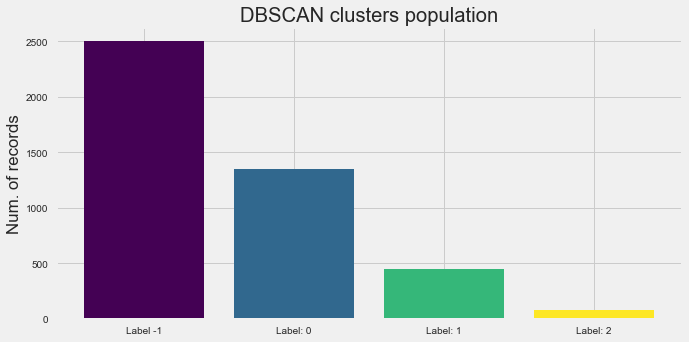

In [44]:
f, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

v_labels = ['Label -1', 'Label: 0', 'Label: 1', 'Label: 2']
hist = [dbscan_results['Noise population'][ROW], dbscan_results['Population of cluster 0'][ROW], dbscan_results['Population of cluster 1'][ROW], dbscan_results['Population of cluster 2'][ROW]]    
bins = np.histogram(dbscan[ROW].labels_, bins=number_of_classes[0])
axs.bar(list(range(0, len(set(dbscan[ROW].labels_)))), hist, color = color, tick_label=v_labels)
axs.set_title('DBSCAN clusters population')
axs.set_ylabel('Num. of records')

plt.show()

DBSCAN has recognized two bigger clusters, one of which is labeled as noise, and other two smaller ones.
Now we proceed with their analysis in order to understand how they are composed and what these represents.

We plot them distribution of all the indicators of each single cluster.

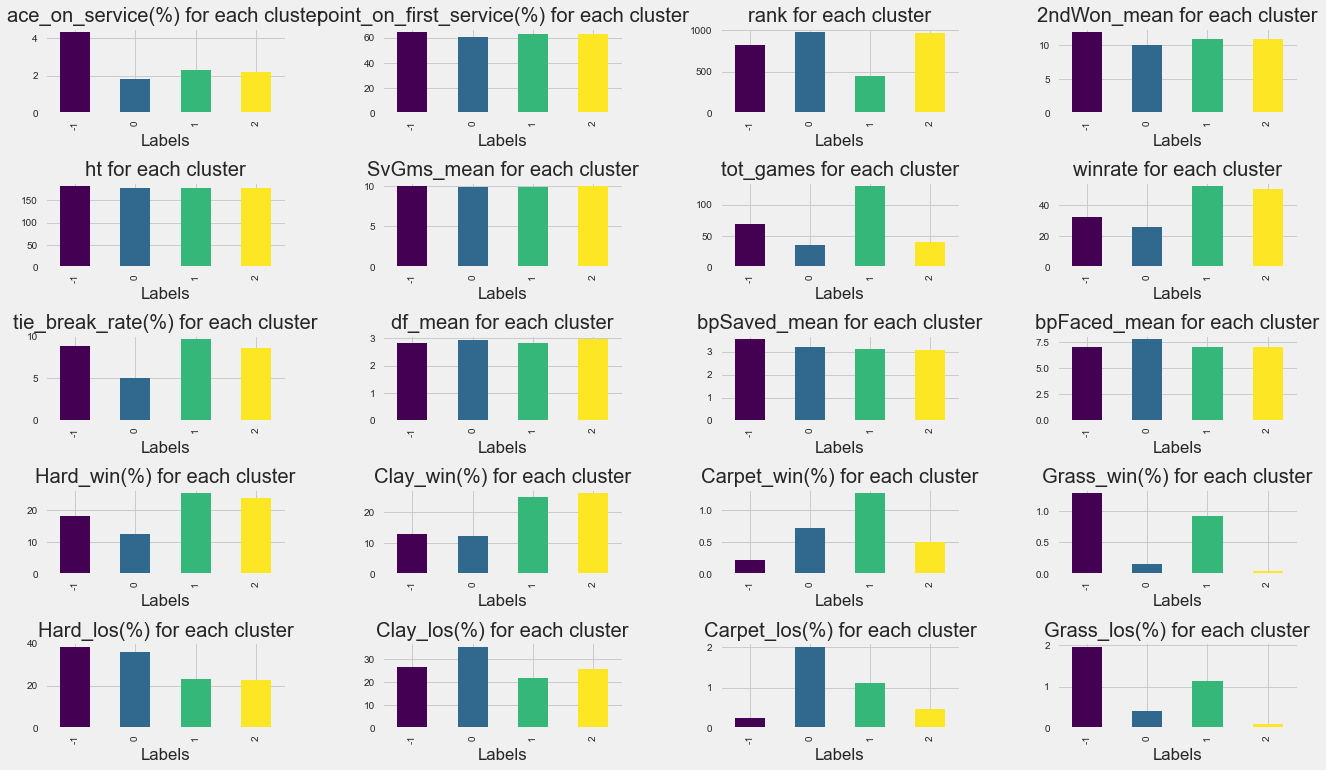

In [45]:
# Set up a grid of plots:
fig = plt.figure(figsize=(20,12))
fig_dims = (5, 4)
fig.subplots_adjust(hspace=0.8, wspace=0.4)

indicators = ['ace_on_service(%)', 'point_on_first_service(%)', 'rank','2ndWon_mean'] 
indicators2 = ['ht', 'SvGms_mean', 'tot_games','winrate']
indicators3 = ['tie_break_rate(%)', 'df_mean', 'bpSaved_mean','bpFaced_mean']
indicators4= ['Hard_win(%)', 'Clay_win(%)', 'Carpet_win(%)','Grass_win(%)']
indicators5 = ['Hard_los(%)', 'Clay_los(%)', 'Carpet_los(%)','Grass_los(%)']

for j in range(0,4):
    plt.subplot2grid(fig_dims, (0,j))
    df_players_profile.groupby('DBS')[indicators[j]].mean().plot(kind='bar',  color=color) 
    plt.title(indicators[j] + ' for each cluster' )
    plt.xlabel('Labels')


for j in range(0,4):
    plt.subplot2grid(fig_dims, (1,j))
    df_players_profile.groupby('DBS')[indicators2[j]].mean().plot(kind='bar',  color=color) 
    plt.title(indicators2[j] + ' for each cluster' )
    plt.xlabel('Labels')

for j in range(0,4):
    plt.subplot2grid(fig_dims, (2,j))
    df_players_profile.groupby('DBS')[indicators3[j]].mean().plot(kind='bar',  color=color) 
    plt.title(indicators3[j] + ' for each cluster' )
    plt.xlabel('Labels')

for j in range(0,4):
    plt.subplot2grid(fig_dims, (3,j))
    df_players_profile.groupby('DBS')[indicators4[j]].mean().plot(kind='bar',  color=color) 
    plt.title(indicators4[j] + ' for each cluster' )
    plt.xlabel('Labels')

for j in range(0,4):
    plt.subplot2grid(fig_dims, (4,j))
    df_players_profile.groupby('DBS')[indicators5[j]].mean().plot(kind='bar',  color=color) 
    plt.title(indicators5[j] + ' for each cluster' )
    plt.xlabel('Labels')

plt.show()

#### **<font color=turquoise> 2.5.4 Conclusions for DBSCAN: </font>**

It is immediate to see that the result of this clustering algorithm applied to this dataset is very unbalanced, it make very difficult to esitmate good division into clusters so that it allows us to define the labels well.

Also different choices of the parameters do not improve the situation, some even make it worse. 

So DBSCAN is **not** the best algorithm for clustering on this data, despite deep cleaning of the data itself. 


The internal metrics of Silhouette and separation scores confirm ours obervations with their bad results:

In [46]:
from sklearn import metrics

sil = silhouette_score(players_profile_num_scaled, dbscan[ROW].labels_)
sep = metrics.davies_bouldin_score(players_profile_num_scaled, dbscan[ROW].labels_)

print('\nSilhouette score: ' + str(sil))
print('Separation score: ' + str(sep))


Silhouette score: -0.12659394838457186
Separation score: 2.042295160320665


The result shows that the two obtained clusters are well-separated, but not so cohesive.

### **<font color=khaki> 2.6 Hierarchical Clustering Analysis  </font>**

It is useful when having an nested structure among the cluster is a necessity. 
The main drawbacks of such approaches are the time and space performances and, for this reasons, they're usually combined with other clustering analysis like k-means.

"The hierarchy of clusters can be visualized with a *dendogram*: a tree structure where the horizontal lines represent the merging of two nodes, or clusters, and the vertical line provides information regarding the distance (or similarity) between said elements.</br>

By the end of the agglomerative bottom-up process, the dendrogram ends up displaying the whole merging process leading to a single universal cluster. Every number of clusters can be obtained by cutting the tree at the right level / height."


Unlike k-means, we initially do not know / specify an initial number of CLUSTER; this allows you to see at a glance the procedure used by the algorithm and the elements in common between the objects

It is divided into two types:
- agglomerative
- divisive 

We will use the *Agglomerative approach*

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

<u>**The first step**</u> is to compute the matrix accounting the distances among each of the point in our dataframe. 

Said computing can be performed by the **scipy** function **pdist** or by specifying the a particulare metric as a parameter of the **AgglomerativeClustering** class of **Sklearn**. 

Both alternatives are able to compute distances with respect to several well-known metrics or even custom ones specifically defined by the user. 
For the sake of this analysis, and due to the rich presence of continuous numerical data, we are going to select the **Euclidean distance** as our metrics of choice.

<u>**The second step**</u> is usually to chose a linkage criterion.

The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion:

- **Ward** minimizes the euclidean distance of the clusters being merged (is the hierarchical analogue of K-means, so it can be used to initialize it)
    - strength: less susceptible to noise and outliers
    - limitations: biased towards globular clusters
- **Min / Single-linkage** uses the minimum of the distances between all observations of the two sets
    - strength: can handle non-elliptical shapes
    - limitations: sensitive to noise and outliers
- **Max / Complete-Linkage** uses the maximum distances between all observations of the two sets
    - strength: less susceptible to noise and outliers
    - limitations: tends to break large clusters, biased towards globular clusters
- **Average-linkage** is a compromise between *single* and *complete* linkage by using the average of the distances of each observation of the two sets
    - strength: less susceptible to noise and outliers
    - limitations: biased towards globular clusters

In [48]:
methods = ['single', 'complete', 'average', 'ward']

**"K" value in hierarchical clustering** :

Hiearchical approaches don't usually provide, at least explicity, an ideal number of clusters. 
Said parameter can be inferred by analysing the dendrogram describing our hierarchy.    

The best "cut" for the dendrogram is placed at a height where the line can traverse the maximum distance without intersecting an horizontal line representing a merging point. 

The **dendrogram** function from **scipy**, uses the **color_threshold** parameter to highlight with different colors each cluster below a certain height. 

This provides powerful insights regarding the main clusters whitin the dataset but, as we are going to prove, the default height computation performed by color_threshold doesn't always coincide with the height of the aforementioned "best cut".)  

- We define a funtion that improves the default visualization of the dendrograms performed by the **dendrogram** function from Scipy by plotting the counts of samples under each node.

In [49]:
def plot_dendrogram(model, **kwargs):
    # create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#### **<font color=turquoise> 2.6.1 Dendrogram Comparison: </font>**

We proceed by plotting the four dendrograms relating to the various linkage methods previously described.<br></br>
The color associated with the various clusters is the result of the default computation of the color_threshold parameter of the scipy dendrogram method. 
The height of the cut suggested by this method is highlighted in the title of each graph.

In [50]:
#we compute the heght of the cut suggested by the default color_threshold
defaults_color_thresholds = []
for method in methods:
    Z = linkage(pca_players_profile, method)
    defaults_color_thresholds.append(0.7*max(Z[:,2]))

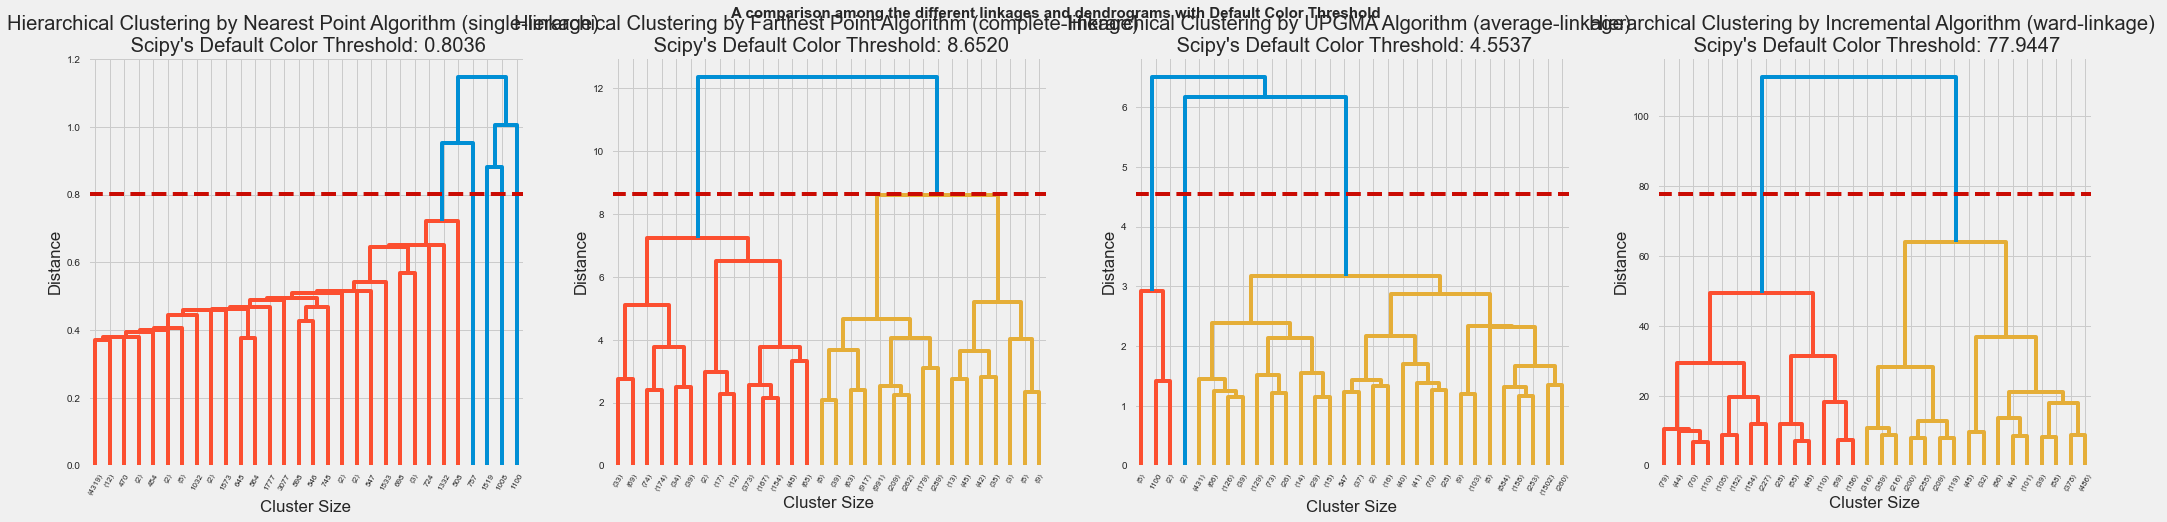

In [51]:
# We plot the four dendrograms
#algorithms = ['MIN/Single link', 'MAX/Complete link', 'UPGMA', 'Incremental']
algorithms = ['Nearest Point', 'Farthest Point', 'UPGMA', 'Incremental']
hierarchical_models = []

f, axs = plt.subplots(ncols=4, figsize=(32,7))

for i in range(len(methods)):
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage=methods[i]).fit(pca_players_profile) 
    plot_dendrogram(model, truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True, ax=axs[i])
    hierarchical_models.append(model)
    
    axs[i].set_title('Hierarchical Clustering by ' + algorithms[i] + ' Algorithm (' + methods[i] + '-linkage) \n Scipy\'s Default Color Threshold: ' + '{:2.4f}'.format(defaults_color_thresholds[i]))
    axs[i].set_xlabel('Cluster Size')
    axs[i].set_ylabel('Distance')
    axs[i].axhline(defaults_color_thresholds[i], ls='--', color='r')

plt.suptitle(('A comparison among the different linkages and dendrograms with Default Color Threshold'),
             fontsize=15, fontweight='bold')
plt.show()

### Identification of the best cut

We define a function to identify the height of the optimal cut within a dendrogram. 

It works by iteratively cutting the tree at an height increased at each step. <br></br>
Each cut *returns the given number of clusters identified by the structure under the cut* 
and, by calculating the value for the number of clusters suggested by the greater number of cuts, we can identify the longest uninterrupted vertical segment of the dendrogram. 

The function takes in input:
- the linkage-method to utilize in order to compute the proximity among the nodes
- the step to utilize to increase the height of the cuts at each iteration and 
- the data for which we want to perform the clustering.

In [52]:
def get_best_cut(linkage, step, norm_dataframe):
    store_n_clusters = []
    store_distances = []

    n_clusters = 0
    i = 0

    while n_clusters != 1:
        distance_threshold = i*step
        model = AgglomerativeClustering(distance_threshold=distance_threshold, n_clusters=None, affinity='euclidean', linkage=linkage).fit(norm_dataframe)
        i = i + 1

        n_clusters = model.n_clusters_
        store_distances.append(distance_threshold)
        store_n_clusters.append(n_clusters)

    df = pd.DataFrame()

    df['distance_thresholds'] = store_distances
    df['n_clusters'] = store_n_clusters
    
    df_n_clusters_groups = df.groupby('n_clusters').size()
    
    n_for_opt_cut = df_n_clusters_groups.agg(['idxmax'])[0]
    distance = df[df.n_clusters == n_for_opt_cut].distance_thresholds.min()
    
    print('Performed analysis for ' + linkage + '-linkage: reached n_clusters = 1 in ' + str(i) + ' steps')
    #print('OPT: Dist = ' + str(distance) + ', n_clusters = ' + str(n_for_opt_cut))     
    
    return n_for_opt_cut, distance

We search the best cut within each of the four dendograms.

In [53]:
steps = [0.01, 0.5 ,0.1, 0.5]

opt_n_clusters = []
heights = []

for i in range(len(methods)):
    n_for_opt_cut, height = get_best_cut(methods[i], steps[i], pca_players_profile)
    opt_n_clusters.append(n_for_opt_cut)
    heights.append(height)
    
hierarchical_distances = pd.DataFrame()
hierarchical_distances['method'] = methods
hierarchical_distances['n_clusters_for_best_cut'] = opt_n_clusters
hierarchical_distances['height'] = heights
hierarchical_distances.set_index(['method'], inplace=True)

hierarchical_distances

Performed analysis for single-linkage: reached n_clusters = 1 in 116 steps
Performed analysis for complete-linkage: reached n_clusters = 1 in 26 steps
Performed analysis for average-linkage: reached n_clusters = 1 in 67 steps
Performed analysis for ward-linkage: reached n_clusters = 1 in 224 steps


,n_clusters_for_best_cut,height
method,,
single,5,0.73
complete,2,9.00
average,3,3.20
ward,2,64.00


We plot the dendrograms again, this time highlighting the best cut identified above. 

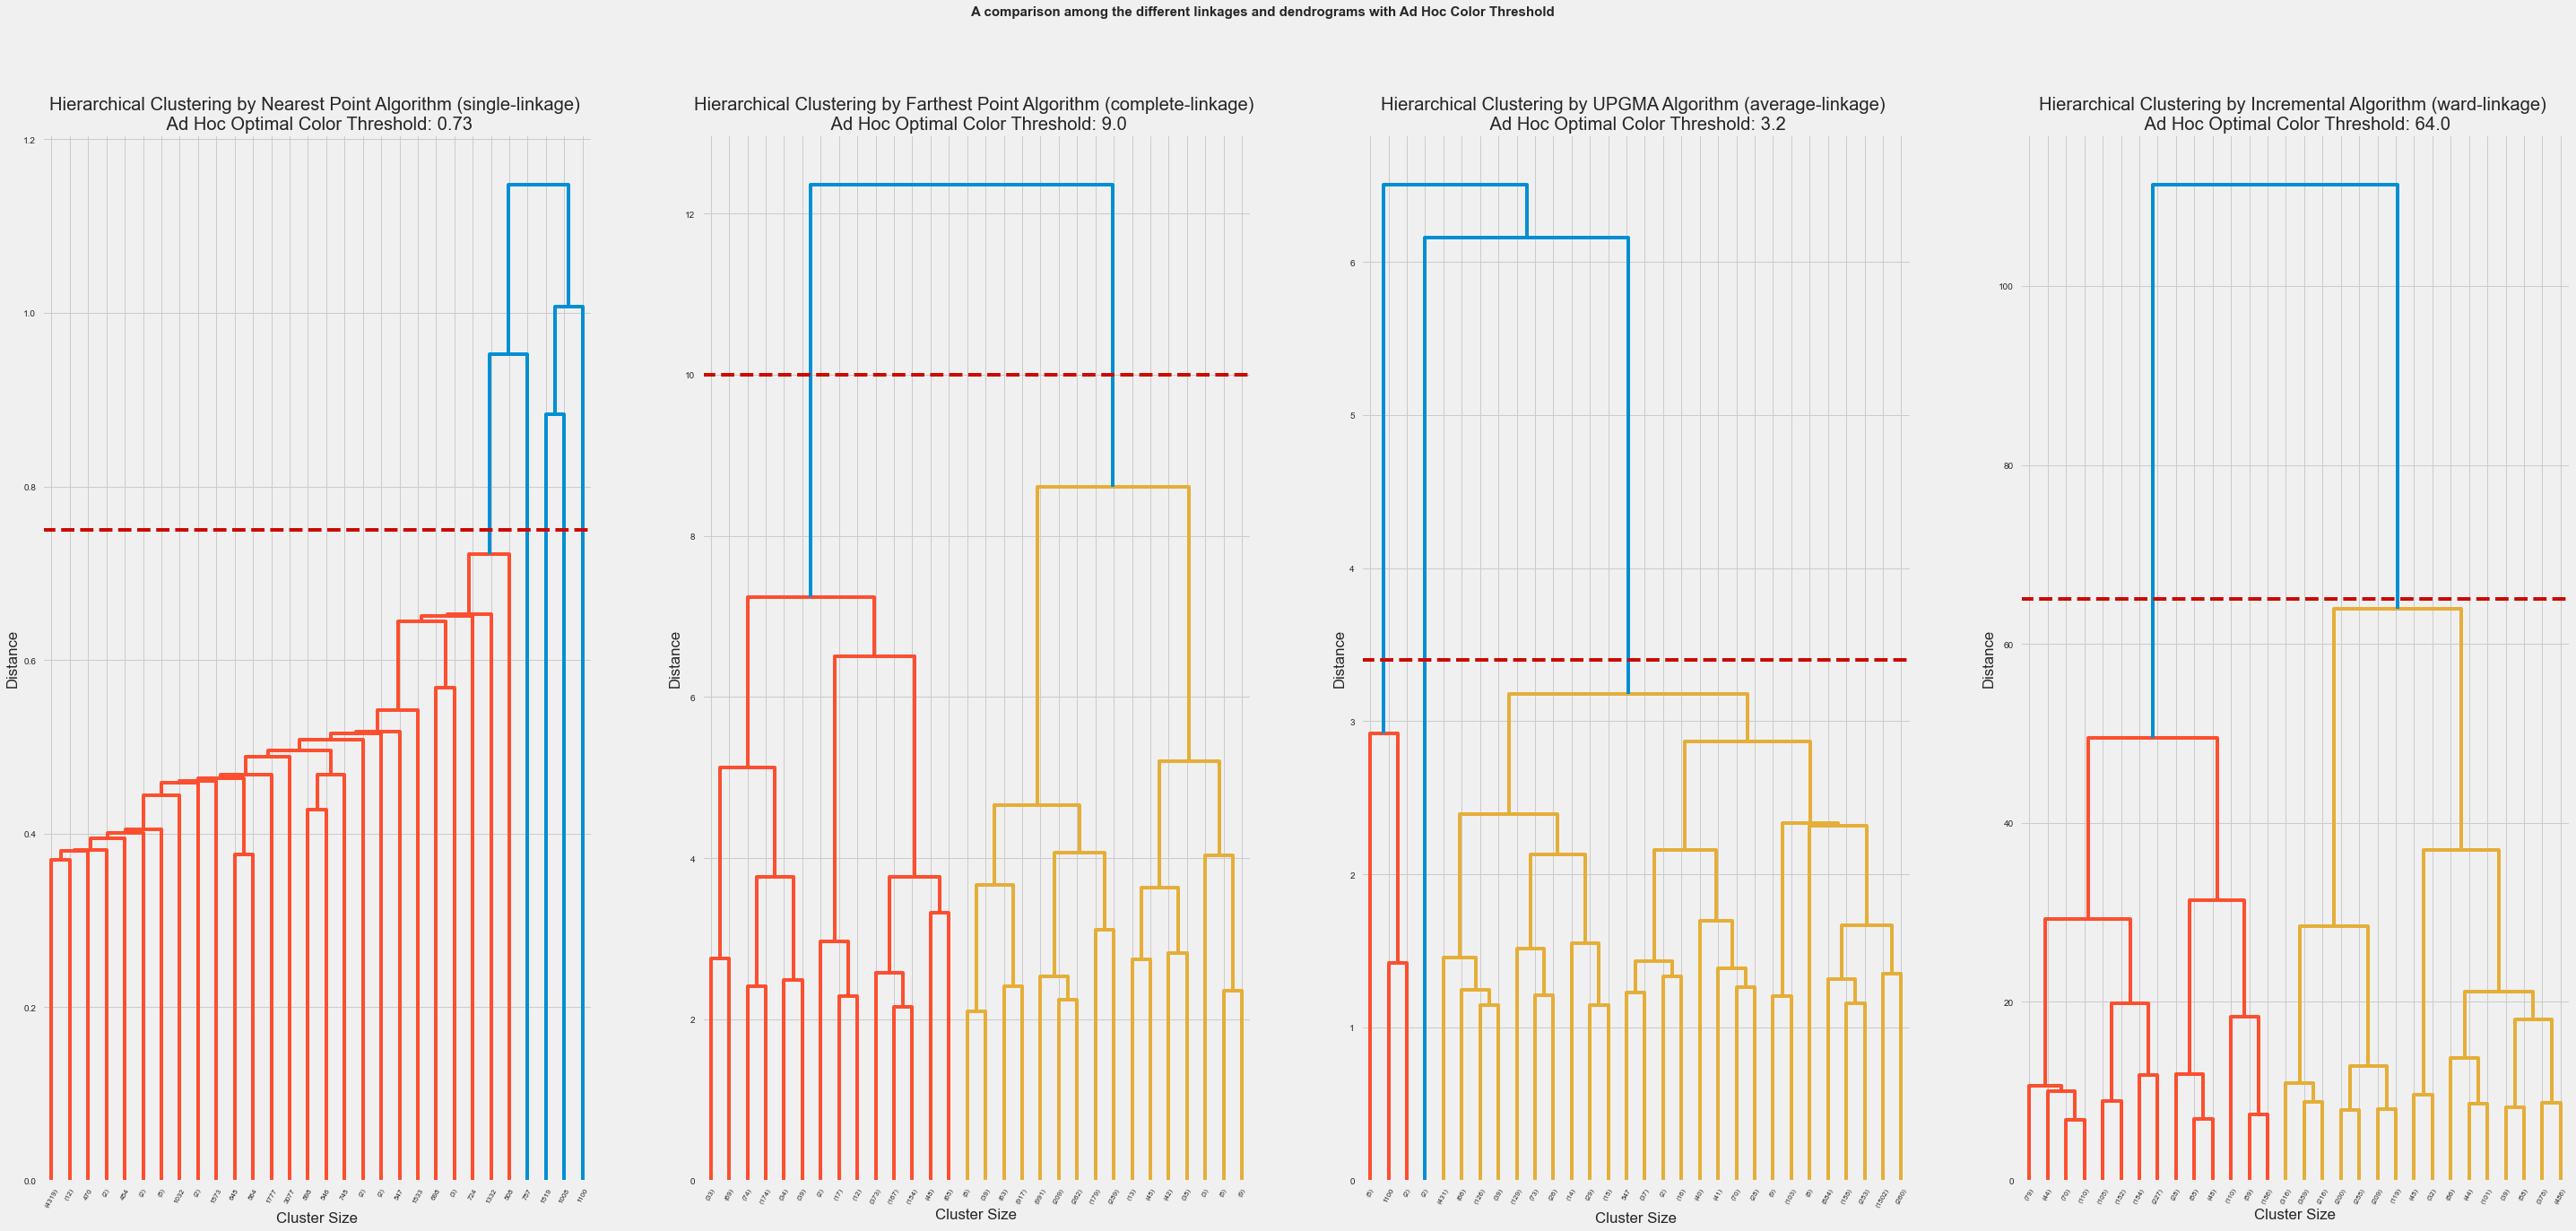

In [54]:
# We plot the four dendrograms
algorithms = ['Nearest Point', 'Farthest Point', 'UPGMA', 'Incremental']
hierarchical_models = []

f, axs = plt.subplots(ncols=4, figsize=(45,20))

for i in range(len(methods)):
    color_threshold = hierarchical_distances.loc[methods[i]].height
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', linkage=methods[i]).fit(pca_players_profile) 
    plot_dendrogram(model, truncate_mode='lastp', p=30, leaf_rotation=60, leaf_font_size = 8, show_contracted=True, ax=axs[i], color_threshold=color_threshold)
    hierarchical_models.append(model)
    
    axs[i].set_title('\n\n\nHierarchical Clustering by ' + algorithms[i] + ' Algorithm (' + methods[i] + '-linkage) \n Ad Hoc Optimal Color Threshold: ' + str(color_threshold))
    axs[i].set_xlabel('Cluster Size')
    axs[i].set_ylabel('Distance')
    axs[i].axhline(color_threshold + steps[i]*2, ls='--', color='r')

plt.suptitle(('A comparison among the different linkages and dendrograms with Ad Hoc Color Threshold\n\n'),
             fontsize=15, fontweight='bold')
plt.show()

We compute and store the labels associated with each cut.

In [55]:
#inizializzato su al dbscan
df_players_profile_clusters = df_players_profile_core.copy()

for i in range(len(methods)):
    opt_n_clusters = int(hierarchical_distances.loc[methods[i]].n_clusters_for_best_cut)
    labels = AgglomerativeClustering(n_clusters=opt_n_clusters, affinity='euclidean', linkage=methods[i]).fit_predict(pca_players_profile)
    df_players_profile_clusters[methods[i]] = labels

df_players_profile_clusters[['single', 'complete', 'average', 'ward']]



,single,complete,average,ward
id,,,,
105935,0,1,0,1
126502,0,1,0,1
138845,0,1,0,1
202165,0,1,0,1
134886,0,0,0,0
...,...,...,...,...
202478,0,0,0,0
205922,0,0,0,0
201554,0,0,0,0


### Clustering Evaluation:

- Davies Bouldini, Silhouette, Calinski Harabasz:

In [56]:
metrics_results=pd.DataFrame() # we create a dataframe to contain the results of the evaluation
    
dav_b=[]
sil=[]
cal_har=[]

for method in methods:
    dav_b.append(davies_bouldin_score(pca_players_profile, df_players_profile_clusters[method]))
    sil.append(silhouette_score(pca_players_profile, df_players_profile_clusters[method]))
    cal_har.append(calinski_harabasz_score(pca_players_profile, df_players_profile_clusters[method]))

metrics_results['Linkage'] = methods
metrics_results['Davies_Bouldini'] = dav_b
metrics_results['Silhouette'] = sil
metrics_results['Calinski_Harabasz'] = cal_har
metrics_results.set_index(['Linkage'], inplace=True)
metrics_results

,Davies_Bouldini,Silhouette,Calinski_Harabasz
Linkage,,,
single,0.261328,0.597743,11.300066
complete,0.928356,0.469164,3294.226397
average,0.413312,0.577985,63.245773
ward,0.909955,0.454844,3591.802591


- Cophenetic Correlation Coefficient:

In [57]:
cophenetic_coefficients = []

for method in methods:
    Z = linkage(df_players_profile_core, method)
    cophenetic_coefficients = np.append(cophenetic_coefficients, np.corrcoef(pdist(df_players_profile_core), cophenet(Z))[0][1])

In [58]:
hierarchical_eval = pd.DataFrame()
hierarchical_eval['method'] = methods
hierarchical_eval['cophenetic_corr'] = cophenetic_coefficients
hierarchical_eval.set_index(['method'], inplace=True)
hierarchical_eval

,cophenetic_corr
method,
single,0.522618
complete,0.684141
average,0.708492
ward,0.681114


From these metrics , in particular following the cophenetic we could say that the best linkage method for our case is the *Average-linkage* 